<h1 style="text-align: center; font-weight: bold;">Module-03</h1>
<h3 style="text-align: center;">Data Visualization</h3>
<h3 style="text-align: center;">DATA-6550</h3>

<h4 style="text-align: center; line-height: 1.5;">By<br><b>Richard Hoehn</b></h4>

<hr style="height:10px; border:0px; background: linear-gradient(to right, white, blue, white); margin:50px;">

# Import Libraries & Setup Constants

In [4]:
# Imports of main Libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

# Chi-Square Test
from scipy.stats import chi2_contingency

# Handle Warnings
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

#style options
%matplotlib inline

# Main Settings for Panda Display & Plotting Colors
pd.set_option('display.max_columns', 500) # Allows for up to 500 columns to be displayed when viewing a dataframe
plt.style.use('seaborn-v0_8') # A style that can be used for plots

# Constants - General Use
DEV_SIZE  = 1 # Development Size of Dataset
RND       = 42  # Randome Init
TEST_SIZE = 0.3 # Size of Training Data Used
STARS     = 50  # Sapcer for comments

In [5]:
#---------------------------------------------------------
#--- Date Loading into Single Dataframe
#---------------------------------------------------------

# 01 - Import
print("Importing Data")
print("*"*STARS)
df = pd.read_csv('../../Data/titanic.csv')

# 02 - Display Row Count
print(f"Titanic Data => {df.shape[0]:,.0f} Rows")
print("*"*STARS)

# 03 - Show DataFrame
display(df.head(10))

Importing Data
**************************************************
Titanic Data => 891 Rows
**************************************************


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [6]:
#---------------------------------------------------------
#--- Fromatting & Cleaning
#---------------------------------------------------------

# 01 - Round Age
df['age'] = df['age'].round()

# 02 - Round Fare
df['fare'] = df['fare'].round()


<hr style="height:10px; border:0px; background: linear-gradient(to right, white, blue, white); margin:50px;">

# **Analysis - Bad Visualizations**

Creating poor visualizations was not particularly challenging on this project. Actually it was easy to generate misleading or cluttered charts I think more than good ones.

Initially, I experimented with overly complex reports that, while technically accurate, were difficult to interpret due to their lack of clarity. The following are some key observations about the individual visualizations and their issues.

---

### **Issues with Income vs. Gender**
One of the main problems with this visualization is that the income data spans a wide range, creating a misleading impression that every possible income bracket is equally represented. In reality, this is not the case, but the visualization distributes the data in a way that gives this false impression. A better approach would be to use logarithmic scaling or binning to group income levels more effectively.

---

### **Issues with the Embark Town Visualization**

The "Embark Town Visualizations" (shown below) contain several misleading elements that can lead to incorrect interpretations of the data.

#### **1. Lack of Standardization in Scale and Proportions**  
The three bar charts use different y-axis scales, making direct comparisons difficult. For instance, the "Embark Town vs. Survival" chart suggests that survival rates varied significantly between embarkation towns, but the absolute number of passengers embarking at each location is not normalized. Since Southampton had the highest passenger count, it dominates the visualization, making it hard to see meaningful trends for the other towns.

#### **2. Confusing Use of Categories**  
The second and third charts both compare embarkation town with class and sex, but they have similar titles, which could lead to confusion. Additionally, the "Embark Town vs. Class" chart on the right uses different colors to represent gender rather than class, making it inconsistent with the previous chart.

---

### **Issues with the Gender Visualization**

The "Gender Visualizations" contain multiple problems that make them difficult to interpret:

#### **1. Poor Layout and Readability**  
The chart has a large amount of whitespace at the top due to an improperly placed legend, which wastes valuable space and disrupts the readability of the visualizations below.

#### **2. Gender vs. Survival Misrepresentation**  
The "Gender vs. Survival" chart shows survival counts rather than survival rates. Since there were more male passengers overall, the raw count of male survivors appears much smaller than female survivors. However, the survival **rate** among females was actually much higher. 

#### **3. Overuse of Colors in Gender vs. Age**  
The "Gender vs. Age" chart is cluttered and difficult to interpret because of excessive use of colors. Each age has been assigned a different color, leading to an overwhelming and unreadable visual.

---

### **Final Thoughts**
These examples highlight how visualizations can be misleading or ineffective when they lack proper scale standardization, appropriate labeling, or logical structuring.

**************************************************
Percentage of Embark Town


embark_town
Southampton    72.440945
Cherbourg      18.897638
Queenstown      8.661417
Name: proportion, dtype: float64

**************************************************


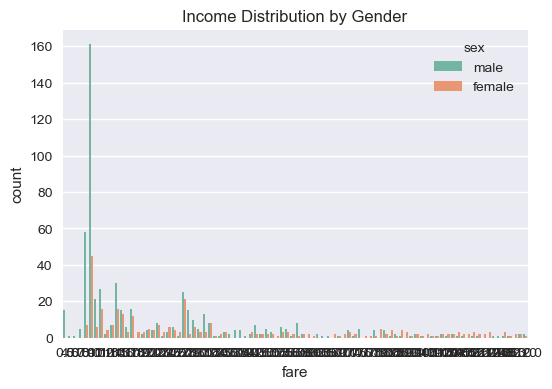

In [8]:
#---------------------------------------------------------
#--- Data & Visualizations
#---------------------------------------------------------

# 01 - Checking class balance for Embark Town
print("*"*STARS)
print("Percentage of Embark Town")
display(df['embark_town'].value_counts(normalize=True) * 100)
print("*"*STARS)

# 02 - Show it as a Grpah
plt.figure(figsize=(6, 4))
sns.countplot(x='fare', hue='sex', data=df, palette='Set2')
plt.title('Income Distribution by Gender')
plt.show()


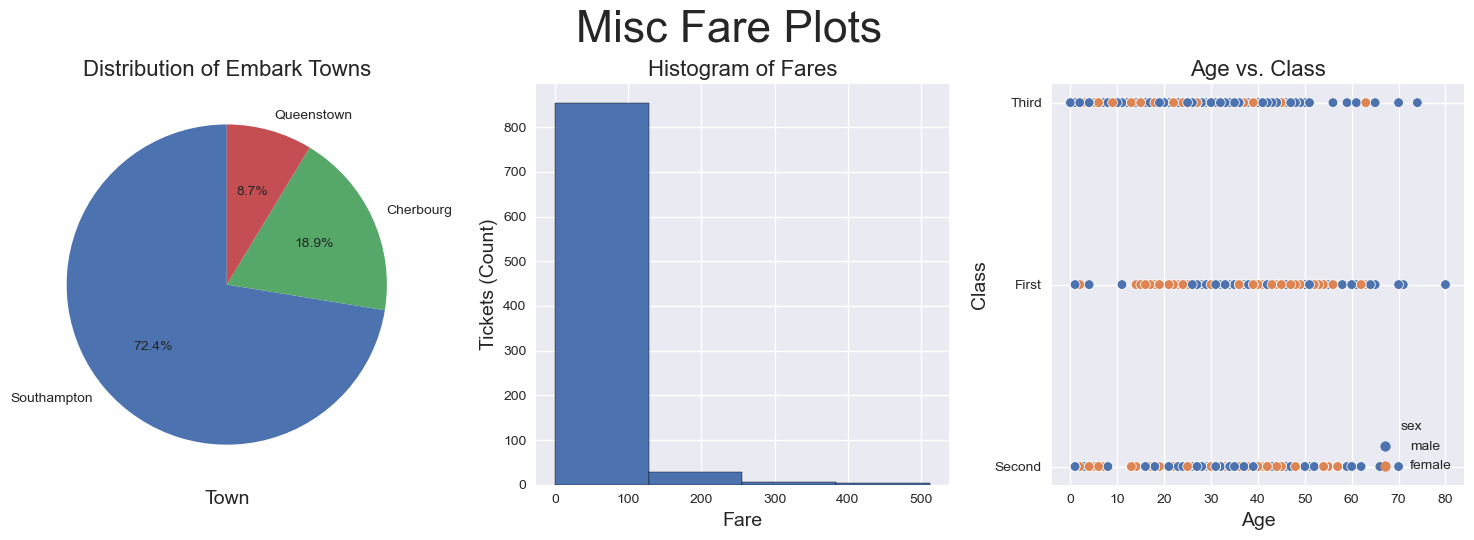

In [9]:
# Create Residuals Analisis
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# 01 - Calculate the distribution of Embark Town
embark_counts = df['embark_town'].value_counts()

# 02 - Histogram Embark Town pie
axs[0].pie(embark_counts, labels=embark_counts.index, autopct='%1.1f%%', startangle=90)
axs[0].set_title(f'Distribution of Embark Towns', fontsize=16)
axs[0].set_xlabel('Town', fontsize=14)

# 03 - Histogram Fare
axs[1].hist(df['fare'], bins=4, edgecolor='black')
axs[1].set_title('Histogram of Fares', fontsize=16)
axs[1].set_xlabel('Fare', fontsize=14)
axs[1].set_ylabel('Tickets (Count)', fontsize=14)

# 04 - Scatter of Age vs. Class
sns.scatterplot(data=df, x='age', y='class', hue='sex', ax=axs[2], palette="deep")
axs[2].set_title(f'Age vs. Class', fontsize=16)
axs[2].set_xlabel('Age', fontsize=14)
axs[2].set_ylabel('Class', fontsize=14)
axs[2].grid(True)

# 05 - Adjust layout and show the plot
plt.tight_layout()
plt.suptitle('Misc Fare Plots', fontsize=32, y=1.07)
plt.savefig("plot_fares.png", bbox_inches = "tight")
plt.show()

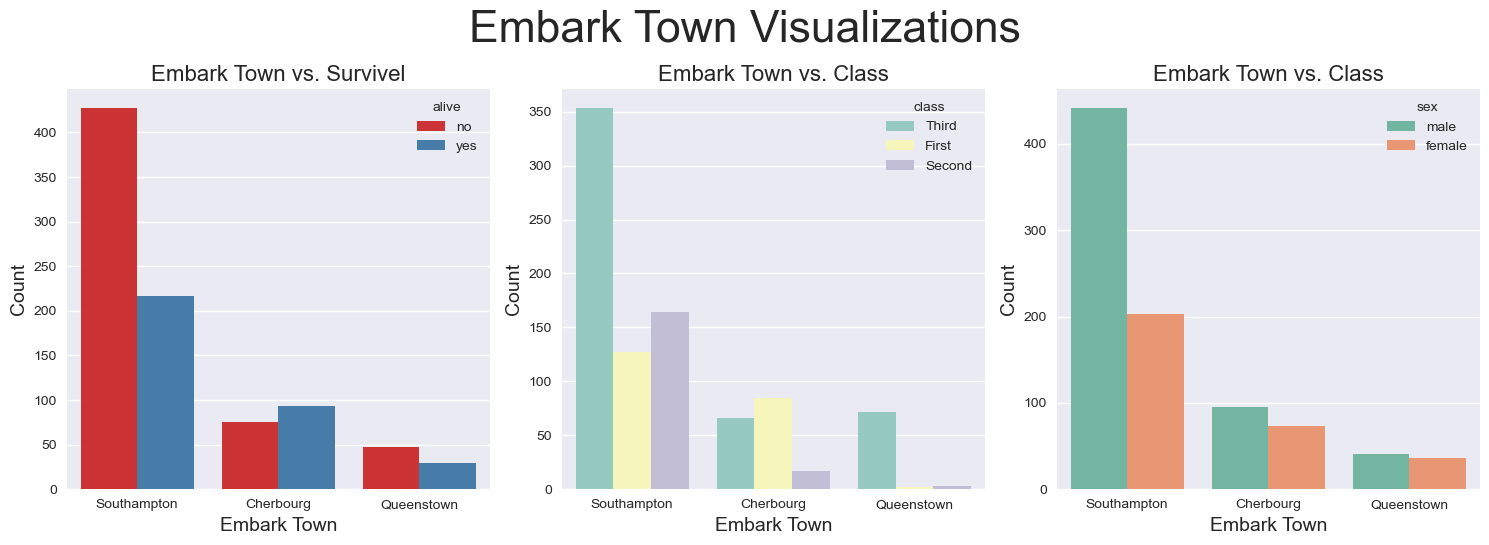

In [10]:
# 01 - Create Residuals Analisis
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# 02 - Embark Town vs. Survivel
sns.countplot(x='embark_town', hue='alive', data=df, palette='Set1', ax=axs[0])
axs[0].set_title('Embark Town vs. Survivel', fontsize=16)
axs[0].set_xlabel('Embark Town', fontsize=14)
axs[0].set_ylabel('Count', fontsize=14)

# 03 - Embark Town vs. Fare
sns.countplot(x='embark_town', hue='class', data=df, palette='Set3', ax=axs[1])
axs[1].set_title('Embark Town vs. Class', fontsize=16)
axs[1].set_xlabel('Embark Town', fontsize=14)
axs[1].set_ylabel('Count', fontsize=14)

# 04 - Embark Town vs. Gender
sns.countplot(x='embark_town', hue='sex', data=df, palette='Set2', ax=axs[2])
axs[2].set_title('Embark Town vs. Class', fontsize=16)
axs[2].set_xlabel('Embark Town', fontsize=14)
axs[2].set_ylabel('Count', fontsize=14)

# Adjust layout and show the plot
plt.tight_layout()
plt.suptitle('Embark Town Visualizations', fontsize=32, y=1.08)
plt.savefig("plot_embark_town.png", bbox_inches = "tight")
plt.show()

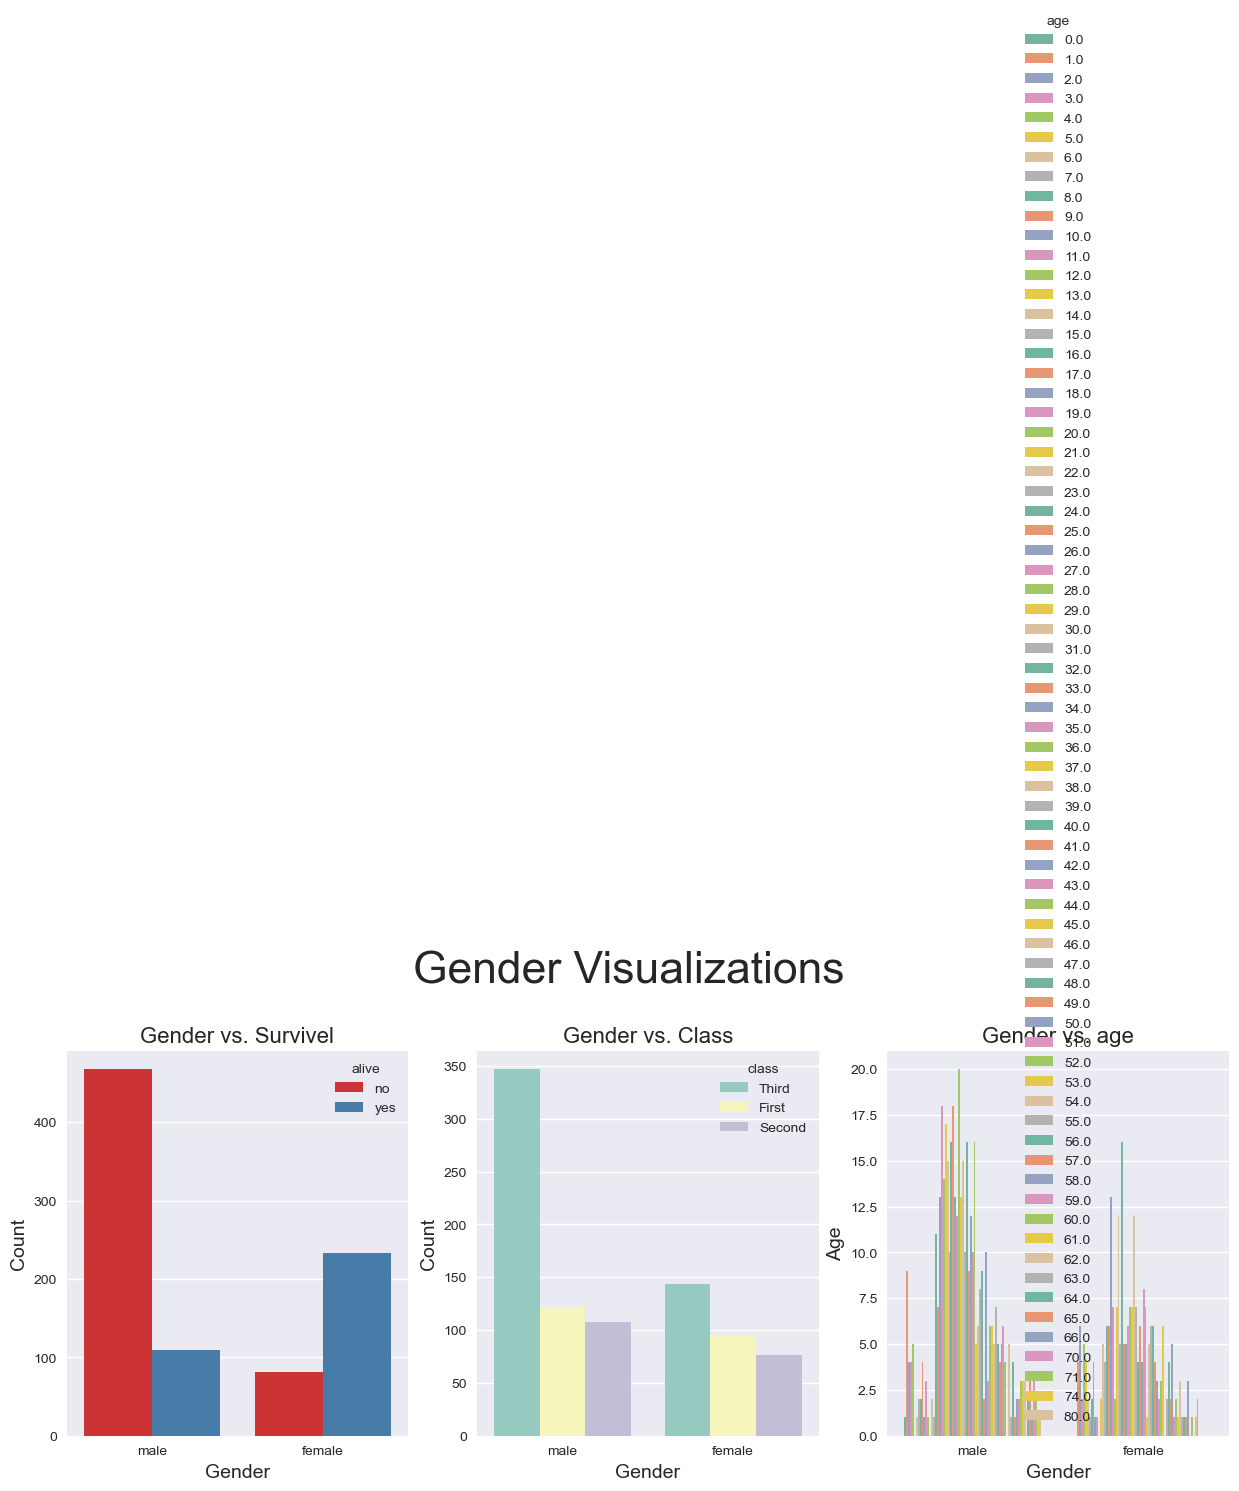

In [11]:
# 01 - Create Residuals Analisis
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# 02 - Embark Town vs. Survivel
sns.countplot(x='sex', hue='alive', data=df, palette='Set1', ax=axs[0])
axs[0].set_title('Gender vs. Survivel', fontsize=16)
axs[0].set_xlabel('Gender', fontsize=14)
axs[0].set_ylabel('Count', fontsize=14)

# 03 - Embark Town vs. Fare
sns.countplot(x='sex', hue='class', data=df, palette='Set3', ax=axs[1])
axs[1].set_title('Gender vs. Class', fontsize=16)
axs[1].set_xlabel('Gender', fontsize=14)
axs[1].set_ylabel('Count', fontsize=14)

# 04 - Embark Town vs. Gender
sns.countplot(x='sex', hue='age', data=df, palette='Set2', ax=axs[2])
axs[2].set_title('Gender vs. age', fontsize=16)
axs[2].set_xlabel('Gender', fontsize=14)
axs[2].set_ylabel('Age', fontsize=14)

# Adjust layout and show the plot
plt.tight_layout()
plt.suptitle('Gender Visualizations', fontsize=32, y=1.08)
plt.savefig("plot_gender.png", bbox_inches = "tight")
plt.show()

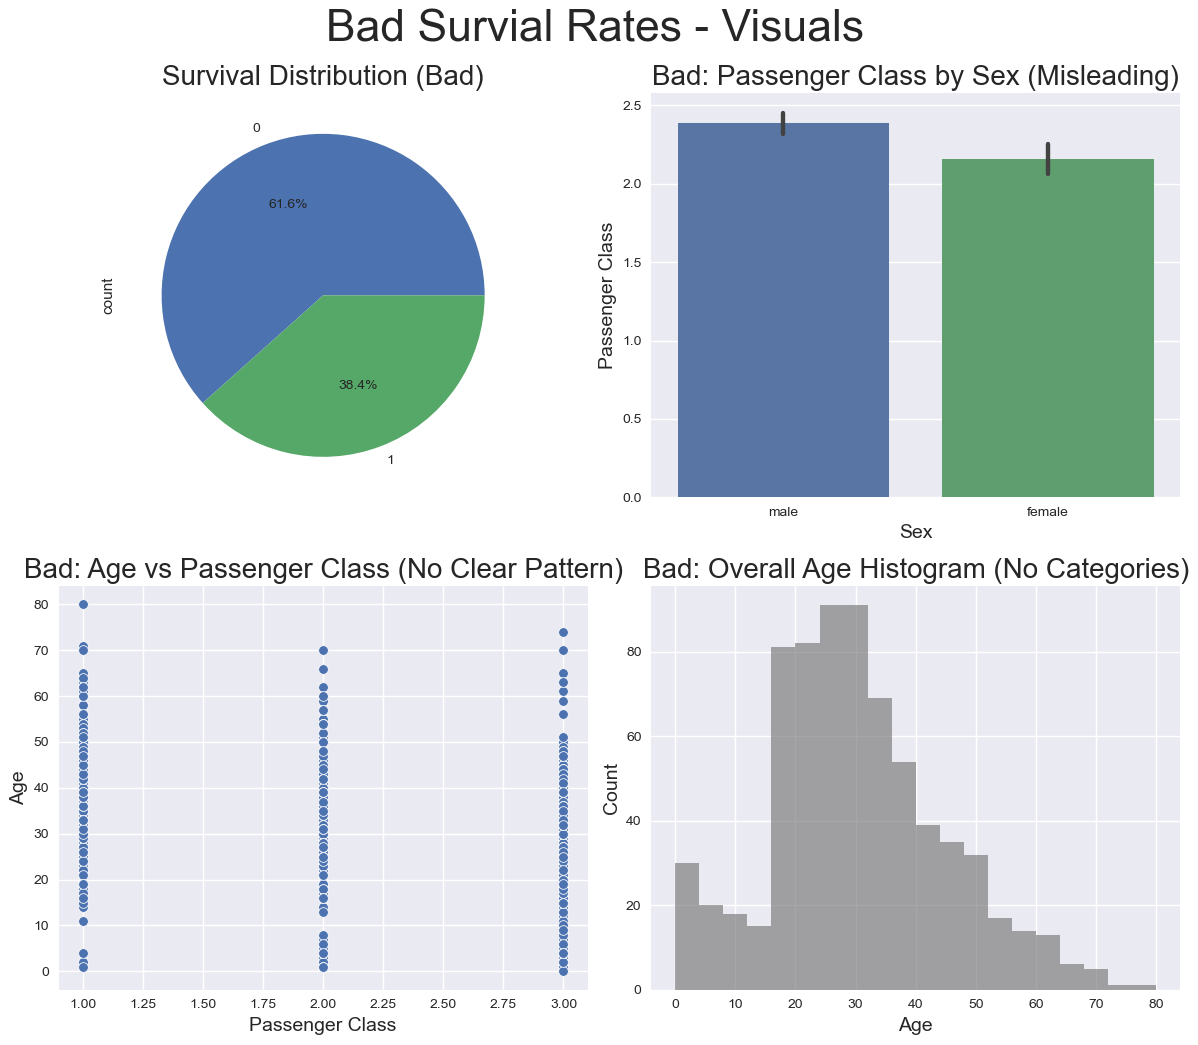

In [12]:
# Create a figure for bad visualizations
fig, axes_bad = plt.subplots(2, 2, figsize=(12, 10))

# 1. Pie Chart for Survival - Too Simplistic
df["survived"].value_counts().plot.pie(autopct="%1.1f%%", ax=axes_bad[0, 0])
axes_bad[0, 0].set_title("Survival Distribution (Bad)", fontsize=20)

# 2. Overlapping Bar Chart for Sex and Class - Misleading
sns.barplot(data=df, x="sex", y="pclass", ax=axes_bad[0, 1])
axes_bad[0, 1].set_title("Bad: Passenger Class by Sex (Misleading)", fontsize=20)
axes_bad[0, 1].set_xlabel("Sex", fontsize=14)
axes_bad[0, 1].set_ylabel("Passenger Class", fontsize=14)

# 3. Scatter Plot of Age vs. Class - Hard to Interpret
sns.scatterplot(data=df, x="pclass", y="age", ax=axes_bad[1, 0])
axes_bad[1, 0].set_title("Bad: Age vs Passenger Class (No Clear Pattern)", fontsize=20)
axes_bad[1, 0].set_xlabel("Passenger Class", fontsize=14)
axes_bad[1, 0].set_ylabel("Age", fontsize=14)

# 4. General Age Histogram Without Categories - No Separation
df["age"].hist(ax=axes_bad[1, 1], bins=20, color="gray", alpha=0.7)
axes_bad[1, 1].set_title("Bad: Overall Age Histogram (No Categories)", fontsize=20)
axes_bad[1, 1].set_xlabel("Age", fontsize=14)
axes_bad[1, 1].set_ylabel("Count", fontsize=14)

# Adjust layout and show the plot
plt.tight_layout()
plt.suptitle('Bad Survial Rates - Visuals', fontsize=32, y=1.04)
plt.savefig("plot_bad_survival_rates.png", bbox_inches = "tight")
plt.show()

<hr style="height:10px; border:0px; background: linear-gradient(to right, white, blue, white); margin:50px;">


# Analysis - Good Visualizations

These visualizations effectively present survival rates using more informative plots. Here are some thought on each of the four (4) visuals below.

---

### **1. Survival Rate by Passenger Class (Top-Left)**
- This bar chart clearly illustrates the survival rate across different passenger classes in percentages.
- The x-axis is categorical (1st, 2nd, and 3rd class), making it easy to compare. all teh classes with eachother. It is easy to see that the better classes survided more.
- The survival rate on the y-axis gives an accurate picture of survival likelihood per class.
- The decreasing trend from 1st class to 3rd class is well-highlighted, reinforcing the well-known historical fact that wealthier passengers had a higher survival rate.

---

### **2. Age Distribution by Survival Status (Top-Right)**
- The histogram with KDE overlays helps visualize the distribution of ages for both survivors and non-survivors.
- The use of different colors for survivors (green) and non-survivors (blue) ensures a clear comparison.
- The peak of non-survivors appears around young adults (~25-35 years), while survivors show a more spread-out distribution, particularly among children.

---

### **3. Fare Distribution by Passenger Class (Bottom-Left)**
- The boxplot format effectively displays the fare distribution across passenger classes.
- It highlights outliers (dots above the boxes), showing that some passengers in 1st class paid significantly more.
- The median fare for each class is easily visible, reinforcing the large financial gap between ticket prices.

---

### **4. Survival Rate by Sex (Bottom-Right)**
- The bar chart effectively communicates the significant disparity in survival rates between males and females.
- The use of two distinct colors makes it visually clear that females had a much higher survival rate.
- The proportional nature of the visualization avoids misleading raw counts, which could misrepresent the survival advantage of females.

---

### **Overall Strengths of These Visualizations**
1. **Effective Use of Proportions:** Unlike bad visualizations that use misleading counts, these charts use proportions, ensuring a clearer interpretation of trends.
2. **Logical Layout:** The arrangement follows a logical progression—class and survival rate, age distribution, fare differences, and gender-based survival rates.
3. **Clear Color Usage:** Each visualization effectively uses colors to distinguish categories without excessive clutter.

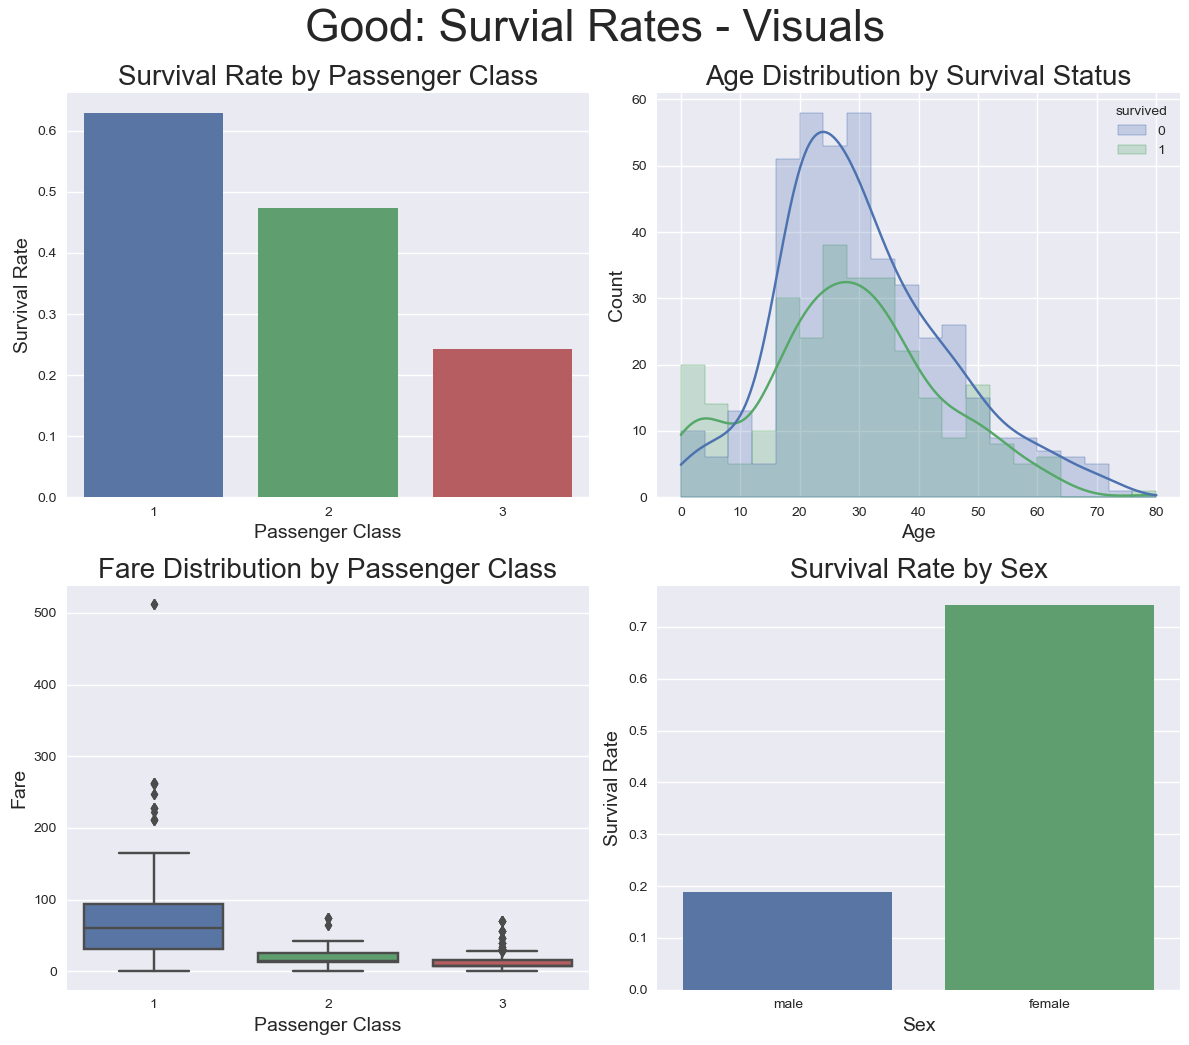

In [14]:
# Create a figure for good visualizations
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 1. Survival Rate by Passenger Class
sns.barplot(data=df, x="pclass", y="survived", ax=axes[0, 0], ci=None)
axes[0, 0].set_title("Survival Rate by Passenger Class", fontsize=20)
axes[0, 0].set_xlabel("Passenger Class", fontsize=14)
axes[0, 0].set_ylabel("Survival Rate", fontsize=14)

# 2. Age Distribution by Survival Status
sns.histplot(df, x="age", hue="survived", element="step", common_norm=False, kde=True, ax=axes[0, 1])
axes[0, 1].set_title("Age Distribution by Survival Status", fontsize=20)
axes[0, 1].set_xlabel("Age", fontsize=14)
axes[0, 1].set_ylabel("Count", fontsize=14)

# 3. Fare Distribution by Passenger Class
sns.boxplot(data=df, x="pclass", y="fare", ax=axes[1, 0])
axes[1, 0].set_title("Fare Distribution by Passenger Class", fontsize=20)
axes[1, 0].set_xlabel("Passenger Class", fontsize=14)
axes[1, 0].set_ylabel("Fare", fontsize=14)

# 4. Survival Rate by Sex
sns.barplot(data=df, x="sex", y="survived", ax=axes[1, 1], ci=None)
axes[1, 1].set_title("Survival Rate by Sex", fontsize=20)
axes[1, 1].set_xlabel("Sex", fontsize=14)
axes[1, 1].set_ylabel("Survival Rate", fontsize=14)

# Adjust layout and show the plot
plt.tight_layout()
plt.suptitle('Good: Survial Rates - Visuals', fontsize=32, y=1.04)
plt.savefig("plot_survival_rates.png", bbox_inches = "tight")
plt.show()